**Librerias del proyecto**

In [2]:
# !pip install --upgrade pip
# !pip install numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info

In [3]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Datos de accidentes de transito

### Cargar los datos

In [4]:
pre_rta = pd.read_csv('RTA Dataset.csv')

pre_rta

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Colecta y validación de datos

### Variables y tipos de datos

In [5]:
pre_rta.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

### ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [6]:
pre_rta.dtypes.value_counts()

object    30
int64      2
dtype: int64

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [7]:
pre_rta.shape # dimenciones del arreglo

(12316, 32)

### ¿Existen valores nulos explicitos en el conjunto de datos?

In [8]:
pre_rta.isnull().any() # Indica si la variable contiene algun valor nulo

Time                           False
Day_of_week                    False
Age_band_of_driver             False
Sex_of_driver                  False
Educational_level               True
Vehicle_driver_relation         True
Driving_experience              True
Type_of_vehicle                 True
Owner_of_vehicle                True
Service_year_of_vehicle         True
Defect_of_vehicle               True
Area_accident_occured           True
Lanes_or_Medians                True
Road_allignment                 True
Types_of_Junction               True
Road_surface_type               True
Road_surface_conditions        False
Light_conditions               False
Weather_conditions             False
Type_of_collision               True
Number_of_vehicles_involved    False
Number_of_casualties           False
Vehicle_movement                True
Casualty_class                 False
Sex_of_casualty                False
Age_band_of_casualty           False
Casualty_severity              False
W

### De tener valores nulos, ¿cuántos tenemos por variable?

In [9]:
pre_rta.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [10]:
pre_rta.isnull().sum().sum()

20057

### ¿Cual es la proporción de valores nulos por cada variable?

In [11]:
pre_rta.isnull().melt()

,variable,value
0,Time,False
1,Time,False
2,Time,False
3,Time,False
4,Time,False
...,...,...
394107,Accident_severity,False
394108,Accident_severity,False
394109,Accident_severity,False
394110,Accident_severity,False


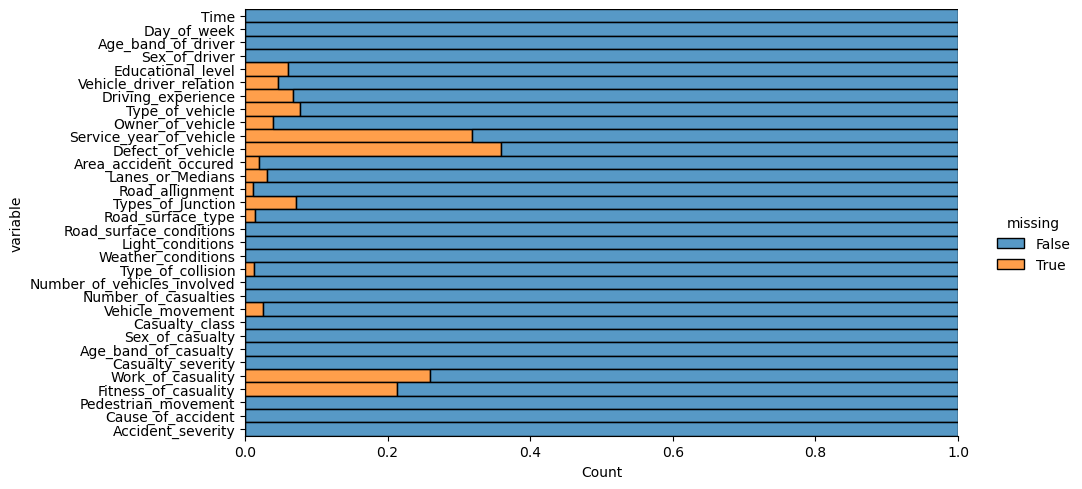

In [12]:
(
    # Verifica si hay valores nulos en el DataFrame pre_rta
    pre_rta
    .isnull()
    # Derrite (melt) el DataFrame para convertirlo en un formato "largo" para Seaborn
    .melt(value_name='missing')
    # Utiliza la función pipe para encadenar operaciones y aplicar Seaborn
    .pipe(
        lambda df: (
            # Crea un gráfico de distribución (displot) usando Seaborn
            sns.displot(
                data=df,
                y='variable',        # Eje y: nombre de la variable
                hue='missing',       # Variable categórica para diferenciar valores nulos
                multiple='fill',     # Rellena las barras para mostrar la proporción de valores nulos
                aspect=2             # Ajuste del aspecto del gráfico
            )
        )
    )
)


### ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

In [13]:
pre_rta.isnull().transpose()

,0,1,2,3,4,5,6,7,8,9,...,12306,12307,12308,12309,12310,12311,12312,12313,12314,12315
Time,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Day_of_week,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Age_band_of_driver,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sex_of_driver,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Educational_level,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
Vehicle_driver_relation,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Driving_experience,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
Type_of_vehicle,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Owner_of_vehicle,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Service_year_of_vehicle,False,False,True,True,False,True,True,False,False,False,...,False,False,True,True,False,True,True,False,False,False


<Axes: >

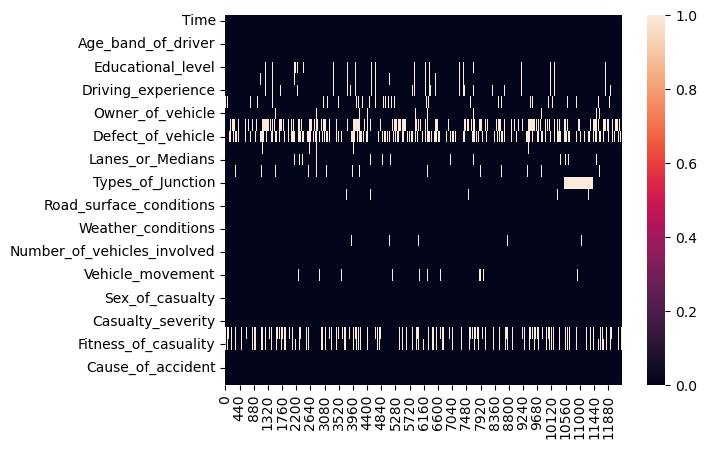

In [14]:
(
    pre_rta
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

### ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [15]:
pre_rta.shape, pre_rta.dropna(),  pre_rta.dropna().shape

((12316, 32),
            Time Day_of_week Age_band_of_driver Sex_of_driver  \
 8      17:20:00      Friday              18-30          Male   
 9      17:20:00      Friday              18-30          Male   
 12     17:45:00    Thursday              18-30          Male   
 13     17:45:00    Thursday              31-50          Male   
 14     17:45:00    Thursday              31-50          Male   
 ...         ...         ...                ...           ...   
 12302  17:25:00      Friday              31-50          Male   
 12303  12:48:00      Friday              31-50          Male   
 12313  13:55:00      Sunday            Over 51          Male   
 12314  13:55:00      Sunday              18-30        Female   
 12315  13:55:00      Sunday              18-30          Male   
 
         Educational_level Vehicle_driver_relation Driving_experience  \
 8      Junior high school                Employee         Above 10yr   
 9      Junior high school                Employee        

### Proporción de datos perdidos al eliminar valores nulos

In [16]:
proportion_of_lost_data = (pre_rta.dropna().shape[0]*pre_rta.dropna().shape[1])/(pre_rta.shape[0]*pre_rta.shape[1])

proportion_of_lost_data

0.2345729132835336

El calculo anterior indica que al eliminar los datos nulos nos quedamos con tan solo el 23 % del total de los datos.

### Podemos quitar algunas columnas para evitar perder demasiados datos

Aunque las columnas Service_year_of_vehicle, Defect_of_vehicle, Work_of_casuality y Fitness_of_casuality puedan contener información muy valiosa como por ejemplo, los defectos del veiculo, comenzaremos eliminando esas columnas para probar la propoción de datos perdidos teniendo en cuenta que se han eliminado dichas columnas.

In [17]:
# Lista de nombres de columnas que deseas eliminar
columnas_a_eliminar = ['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality']

# Utiliza el método drop para eliminar las columnas especificadas
rta_without_some_columns = pre_rta.drop(columns=columnas_a_eliminar)

# Imprimir el DataFrame después de eliminar columnas
print("\nDataFrame después de eliminar columnas:")
print(rta_without_some_columns)


DataFrame después de eliminar columnas:
           Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Emplo

La vista de datos al eliminar las columnas queda de la siguiente forma:

<Axes: >

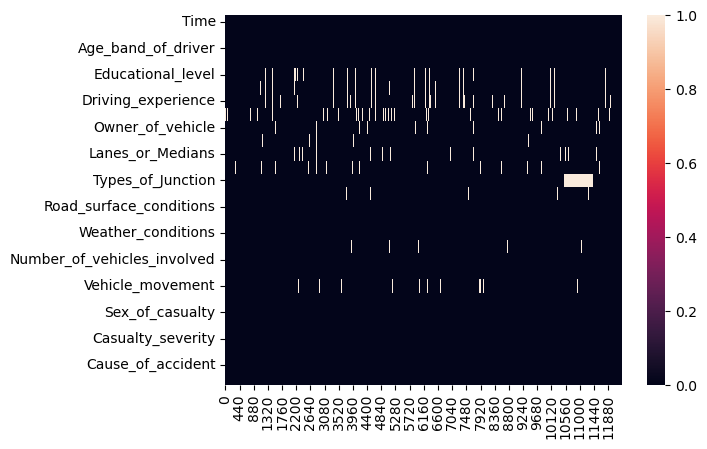

In [18]:
(
    rta_without_some_columns
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

Si a este nuevo datra frame le eliminamos los valores nulos obtenemos:

In [19]:
pre_rta.shape, rta_without_some_columns.dropna(),  rta_without_some_columns.dropna().shape

((12316, 32),
            Time Day_of_week Age_band_of_driver Sex_of_driver  \
 1      17:02:00      Monday              31-50          Male   
 3       1:06:00      Sunday              18-30          Male   
 7      17:20:00      Friday              18-30          Male   
 8      17:20:00      Friday              18-30          Male   
 9      17:20:00      Friday              18-30          Male   
 ...         ...         ...                ...           ...   
 12309   9:05:00      Friday              31-50        Female   
 12312  18:00:00      Sunday            Unknown          Male   
 12313  13:55:00      Sunday            Over 51          Male   
 12314  13:55:00      Sunday              18-30        Female   
 12315  13:55:00      Sunday              18-30          Male   
 
         Educational_level Vehicle_driver_relation Driving_experience  \
 1      Junior high school                Employee         Above 10yr   
 3      Junior high school                Employee        

Y la proporción de datos perdidos en este caso resulta:

In [20]:
proportion_of_lost_data = (rta_without_some_columns.dropna().shape[0]*rta_without_some_columns.dropna().shape[1])/(pre_rta.shape[0]*pre_rta.shape[1])

proportion_of_lost_data

0.599555456316986

De esta menera preservamos un aproximado del 60 % de los datos del data set original.

El propio data set nos ofrece una versión con los datos procesados

In [21]:
cleaned_rta = pd.read_csv('cleaned.csv')

cleaned_rta

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,Unknown,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,2
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,No distancing,2
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Changing lane to the right,1
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving under the influence of drugs,2


¿Este data set tiene valores nulos?

In [22]:
cleaned_rta.isnull().any() # Indica si la variable contiene algun valor nulo

Age_band_of_driver         False
Sex_of_driver              False
Educational_level          False
Vehicle_driver_relation    False
Driving_experience         False
Lanes_or_Medians           False
Types_of_Junction          False
Road_surface_type          False
Light_conditions           False
Weather_conditions         False
Type_of_collision          False
Vehicle_movement           False
Pedestrian_movement        False
Cause_of_accident          False
Accident_severity          False
dtype: bool

La porción de datos del data frame original con el dataset procesado es:

In [23]:
proportion_of_lost_data = (cleaned_rta.shape[0]*cleaned_rta.shape[1])/(pre_rta.shape[0]*pre_rta.shape[1])

proportion_of_lost_data

0.46875

Podemos obserbar tabién que en el data set procesado también han eliminado columnas y ademas se han cambiado algunos datos por el termino 'Unknown'. Por tal razon, si eliminamos las columnas seleccionadas previamiente y cambianto datos por, tendremos mejores resultados.

### Datos procesados finales

Finalmente se eliminaran las columnas: 'Vehicle_driver_relation', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Road_allignment', 'Sex_of_casualty', 'Casualty_severity', 'Work_of_casuality' y 'Fitness_of_casuality'. Además, se cambiaran los valores nulos por 'Unknow'

In [24]:
# Lista de nombres de columnas que deseas eliminar
columnas_a_eliminar = ['Vehicle_driver_relation',
                       'Owner_of_vehicle',
                       'Service_year_of_vehicle',
                       'Defect_of_vehicle',
                       'Area_accident_occured',
                       'Lanes_or_Medians',
                       'Road_allignment',
                       'Sex_of_casualty',
                       'Age_band_of_casualty',
                       'Casualty_severity',
                       'Work_of_casuality',
                       'Fitness_of_casuality']

# Utiliza el método drop para eliminar las columnas especificadas
rta_df = pre_rta.drop(columns=columnas_a_eliminar).fillna('Unknown')


# Imprimir el DataFrame después de eliminar columnas
print("\nDataFrame después de eliminar columnas:")
print(rta_without_some_columns)


DataFrame después de eliminar columnas:
           Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Emplo

In [25]:
rta_df.isnull().any()

Time                           False
Day_of_week                    False
Age_band_of_driver             False
Sex_of_driver                  False
Educational_level              False
Driving_experience             False
Type_of_vehicle                False
Types_of_Junction              False
Road_surface_type              False
Road_surface_conditions        False
Light_conditions               False
Weather_conditions             False
Type_of_collision              False
Number_of_vehicles_involved    False
Number_of_casualties           False
Vehicle_movement               False
Casualty_class                 False
Pedestrian_movement            False
Cause_of_accident              False
Accident_severity              False
dtype: bool

## Conteos y proporciones

### ¿Qué estadisticos describen el conjunto de datos?

**Todas las variables**

In [26]:
rta_df.describe(include = 'all')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316.000000,12316.000000,12316,12316,12316,12316,12316
unique,1074,7,5,3,7,8,18,8,6,4,4,9,10,NaN,NaN,13,4,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,5-10yr,Automobile,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,NaN,NaN,Going straight,Driver or rider,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,3363,3205,4543,11296,9340,8798,10063,8774,NaN,NaN,8158,4944,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.040679,1.548149,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.688790,1.007179,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN


**Solo variables numericas**

In [27]:
rta_df.describe() # Descripción estadistica de las variables numéricas

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


**Solo categóricas - 1**

In [28]:
rta_df.describe(include=object)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316
unique,1074,7,5,3,7,8,18,8,6,4,4,9,10,13,4,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,5-10yr,Automobile,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,3363,3205,4543,11296,9340,8798,10063,8774,8158,4944,11390,2263,10415


**Solo categóricas - 2**

In [29]:
(
    rta_df
    .astype({
        'Day_of_week': 'category',
        'Age_band_of_driver': 'category',
        'Sex_of_driver': 'category',
        'Educational_level': 'category',
        'Driving_experience': 'category',
        'Type_of_vehicle': 'category',
        'Types_of_Junction': 'category',
        'Road_surface_type': 'category',
        'Road_surface_conditions': 'category',
        'Light_conditions': 'category',
        'Weather_conditions': 'category',
        'Type_of_collision': 'category',
        'Vehicle_movement': 'category',
        'Casualty_class': 'category',
        'Pedestrian_movement': 'category',
        'Cause_of_accident': 'category',
        'Accident_severity': 'category'
    })
) # Ya no se puede usar el comando objecjt para la lista anterior

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,1-2yr,Automobile,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,2-5yr,Unknown,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Unknown,2-5yr,Lorry (11?40Q),No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,5-10yr,Automobile,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,5-10yr,Bajaj,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Above 10yr,Lorry (41?100Q),No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [30]:
(
    rta_df
    .astype({
        'Day_of_week': 'category',
        'Age_band_of_driver': 'category',
        'Sex_of_driver': 'category',
        'Educational_level': 'category',
        'Driving_experience': 'category',
        'Type_of_vehicle': 'category',
        'Types_of_Junction': 'category',
        'Road_surface_type': 'category',
        'Road_surface_conditions': 'category',
        'Light_conditions': 'category',
        'Weather_conditions': 'category',
        'Type_of_collision': 'category',
        'Vehicle_movement': 'category',
        'Casualty_class': 'category',
        'Pedestrian_movement': 'category',
        'Cause_of_accident': 'category',
        'Accident_severity': 'category'
    }).describe(include='category')
) # Ya no se puede usar el comando objecjt para la lista anterior

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316
unique,7,5,3,7,8,18,8,6,4,4,9,10,13,4,9,20,3
top,Friday,18-30,Male,Junior high school,5-10yr,Automobile,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Not a Pedestrian,No distancing,Slight Injury
freq,2041,4271,11437,7619,3363,3205,4543,11296,9340,8798,10063,8774,8158,4944,11390,2263,10415


Nota: pandas ofrece mas herramientas para las caterorias que para los objetos.

### Visualizar los conteos de categorías

**Pandas**

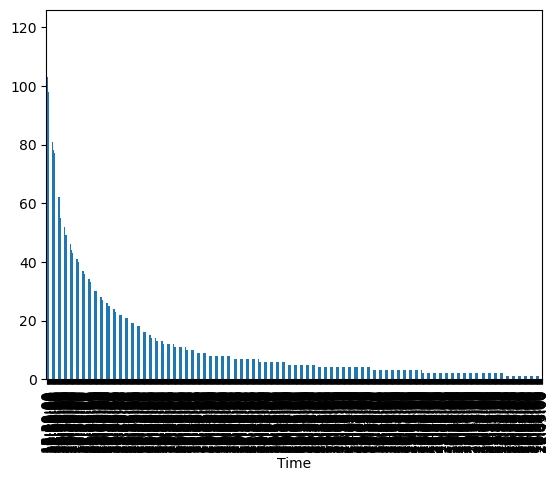

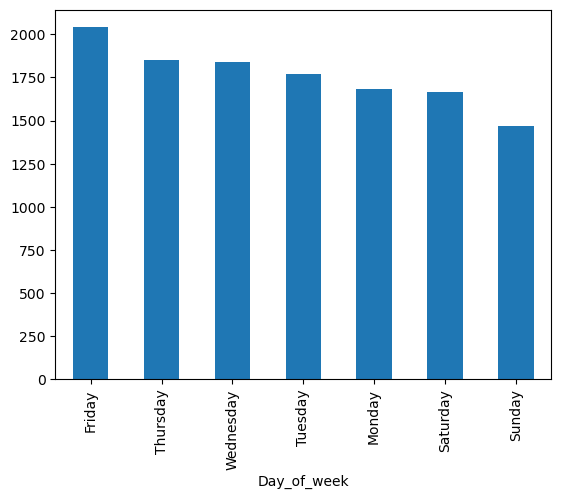

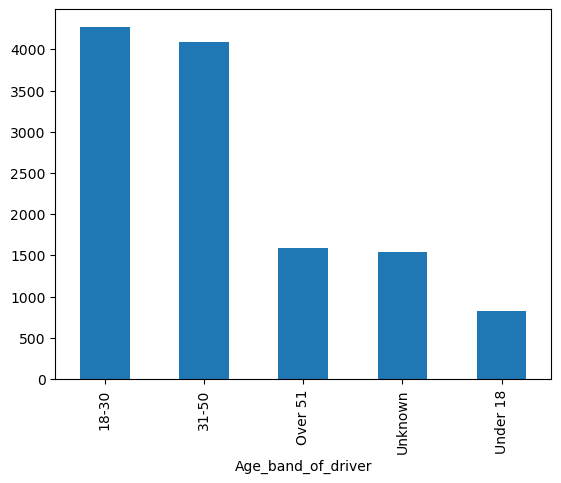

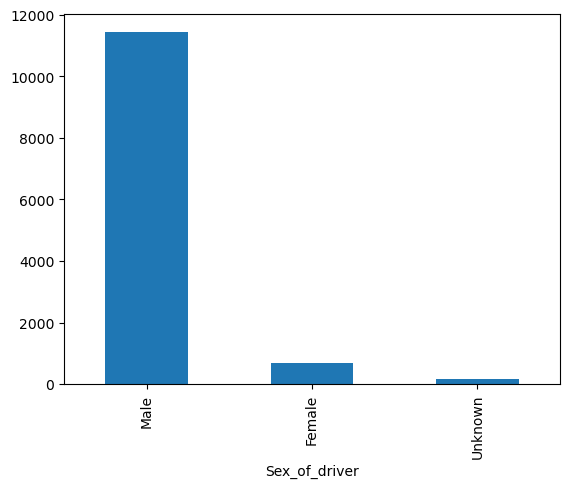

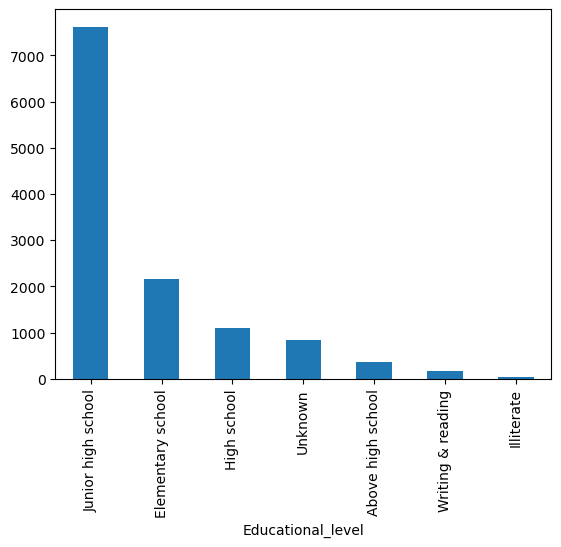

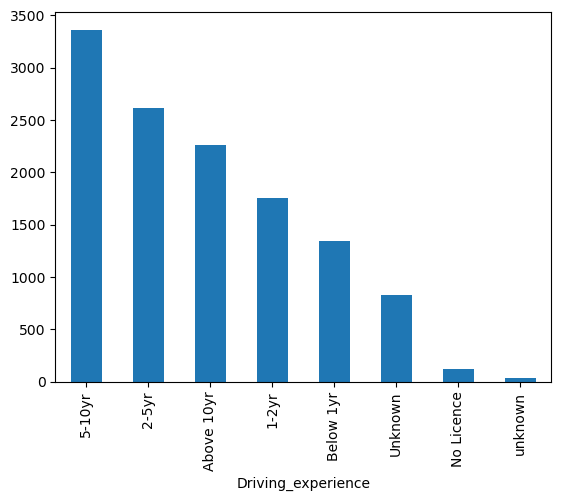

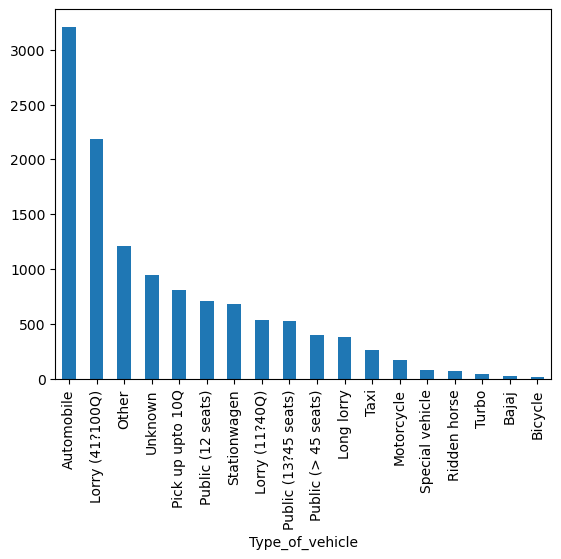

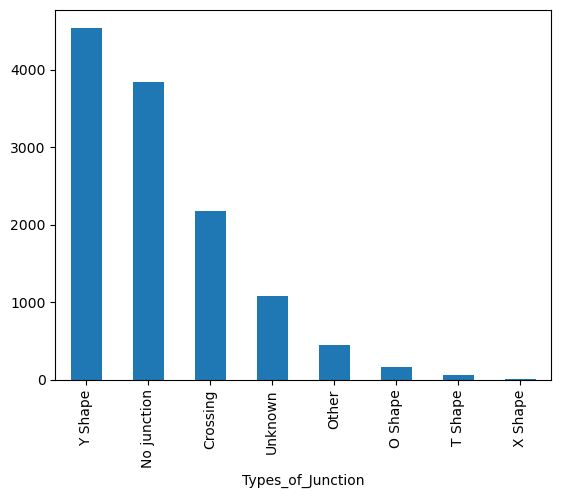

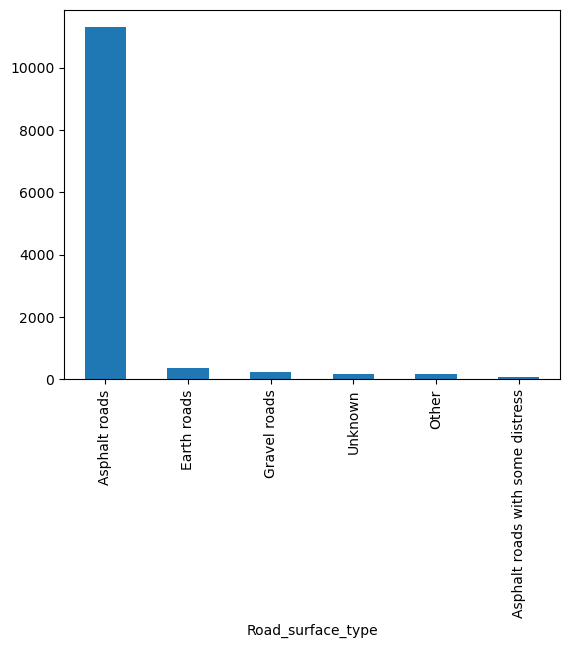

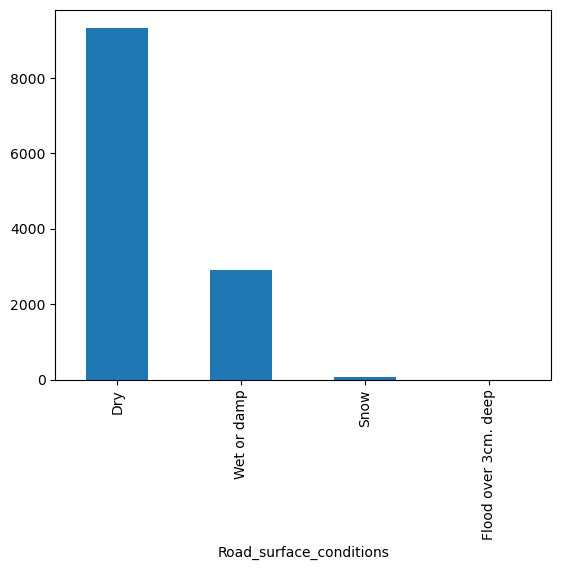

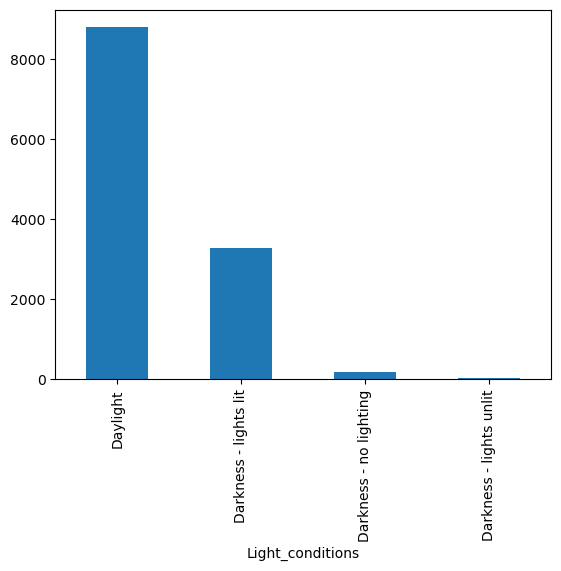

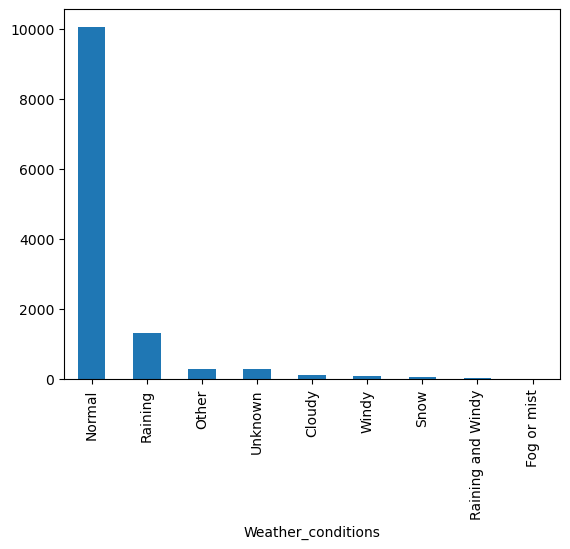

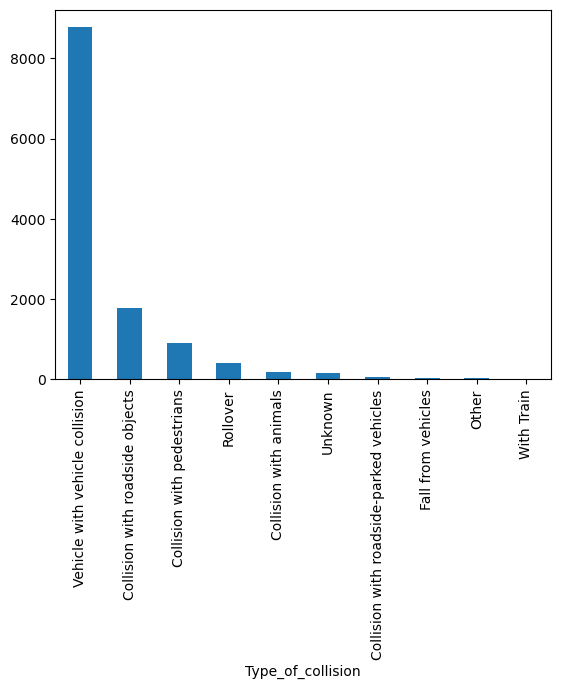

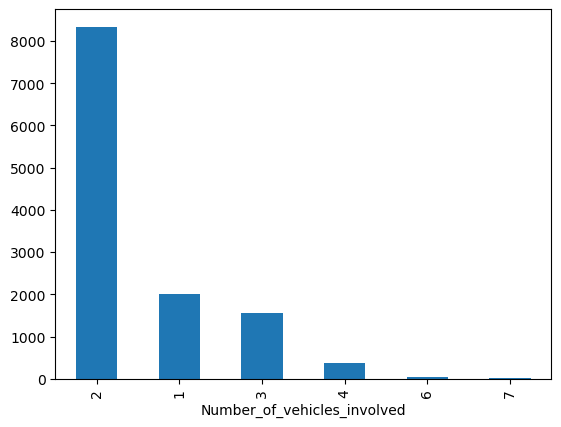

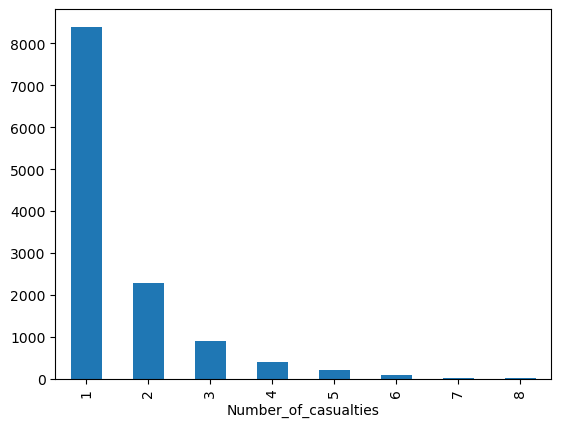

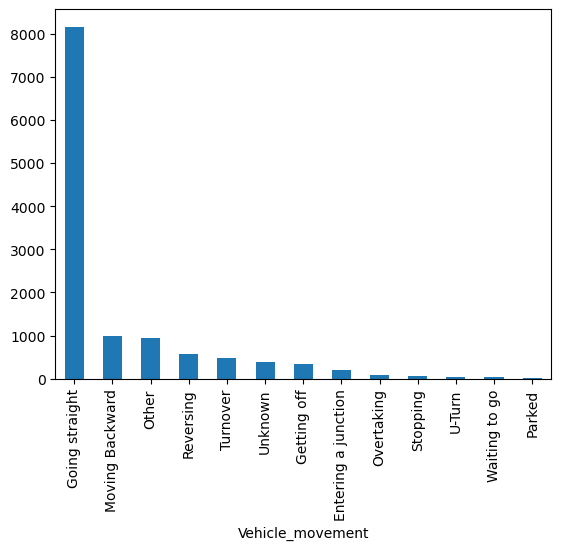

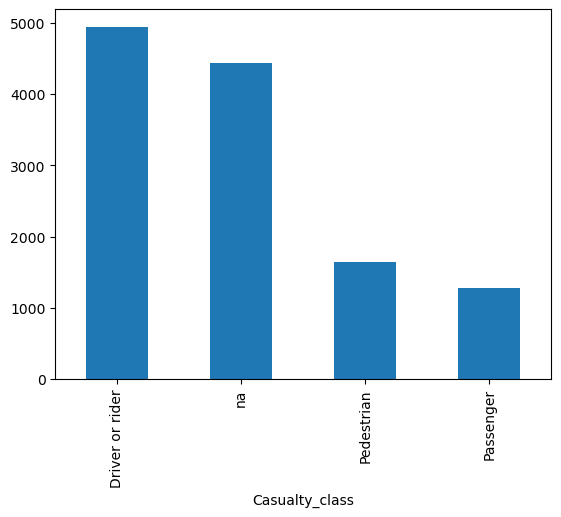

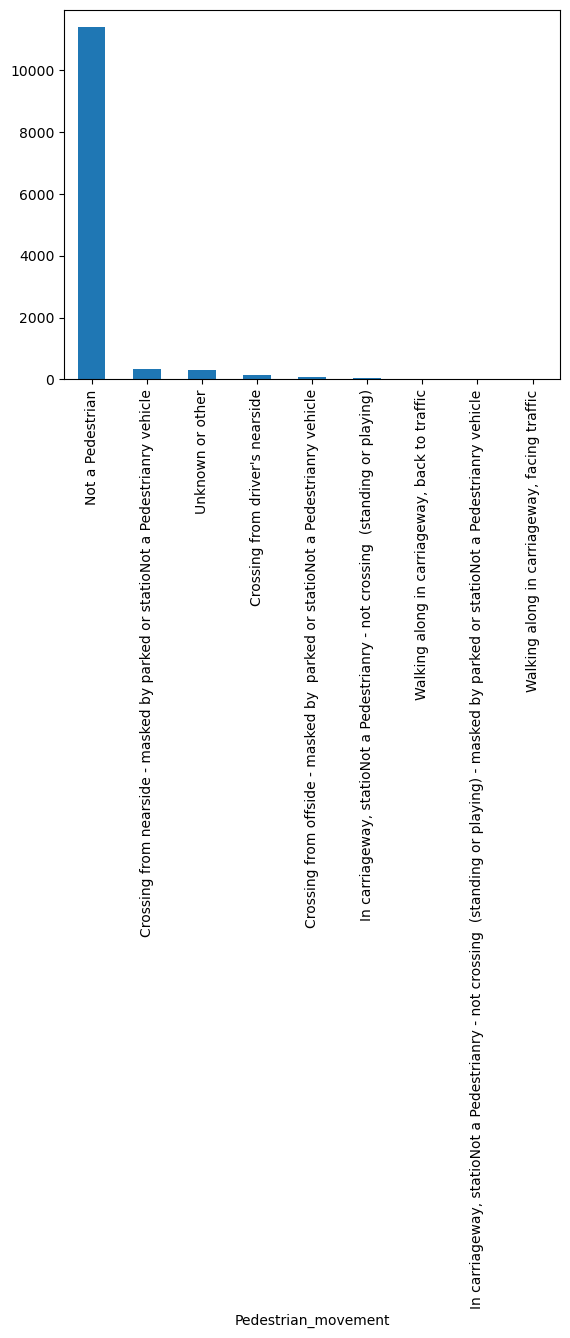

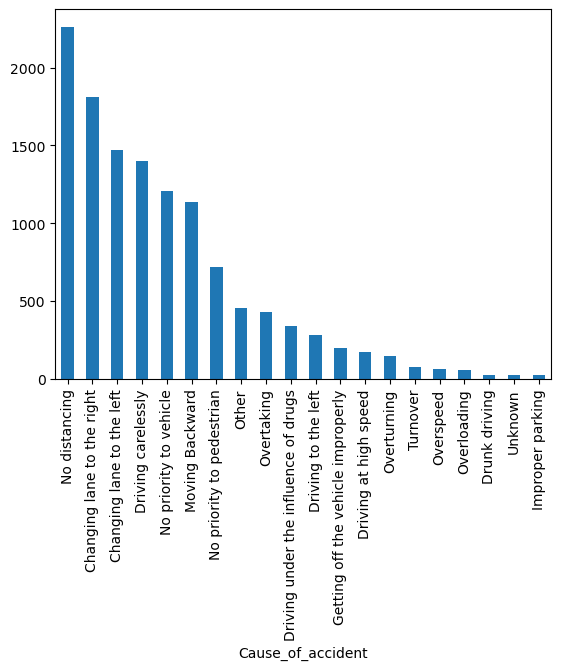

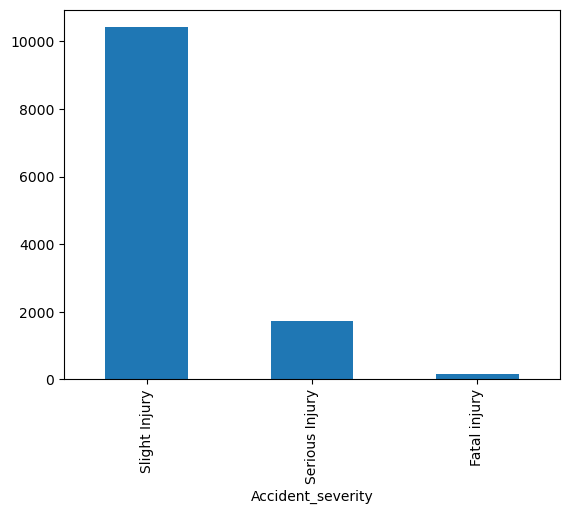

In [31]:
for columna in rta_df.columns:
    (
        rta_df[columna]
        .value_counts()
        .plot(
            kind='bar'
        )
    )
    plt.xlabel(columna)
    plt.show()

**Con Seaborn**

In [32]:
rta_df.columns, type(rta_df), rta_df.columns[2], type(rta_df.columns[2])

(Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
        'Educational_level', 'Driving_experience', 'Type_of_vehicle',
        'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
        'Light_conditions', 'Weather_conditions', 'Type_of_collision',
        'Number_of_vehicles_involved', 'Number_of_casualties',
        'Vehicle_movement', 'Casualty_class', 'Pedestrian_movement',
        'Cause_of_accident', 'Accident_severity'],
       dtype='object'),
 pandas.core.frame.DataFrame,
 'Age_band_of_driver',
 str)

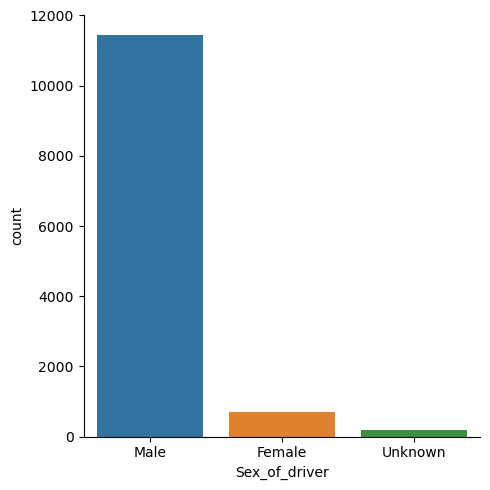

In [33]:
sns.catplot(   # La función catplot en Seaborn se utiliza para crear gráficos categóricos
    rta_df,
    x = rta_df.columns[3],
    kind = 'count'
)

/home/rruiber/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


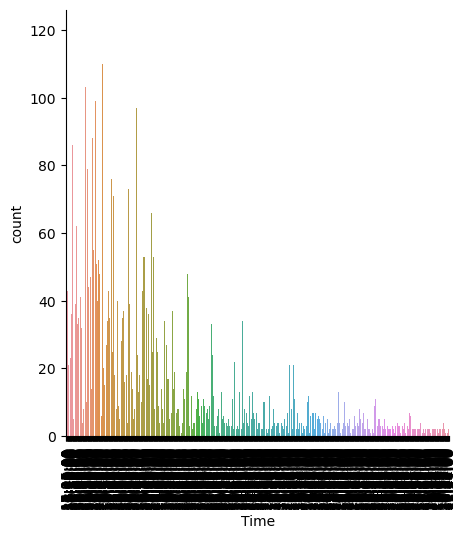

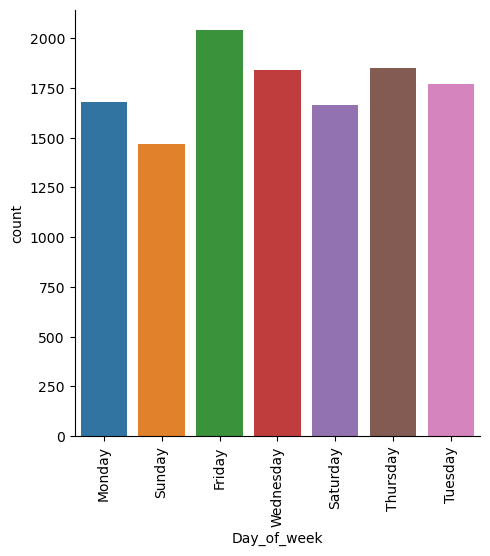

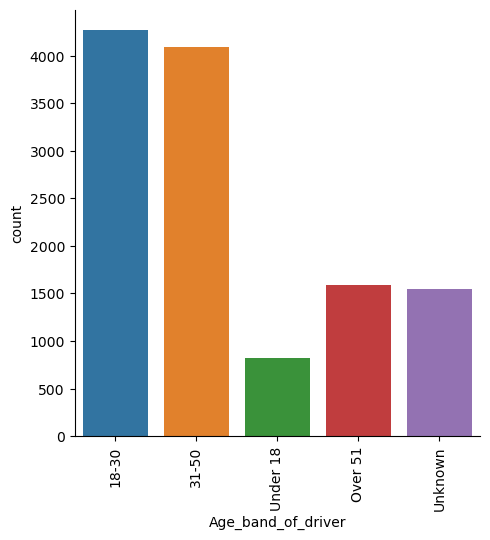

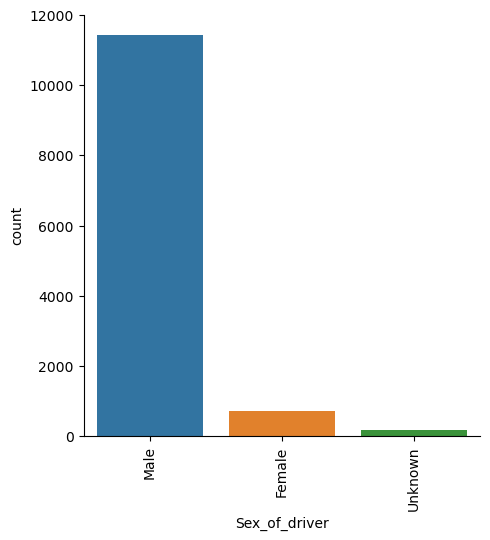

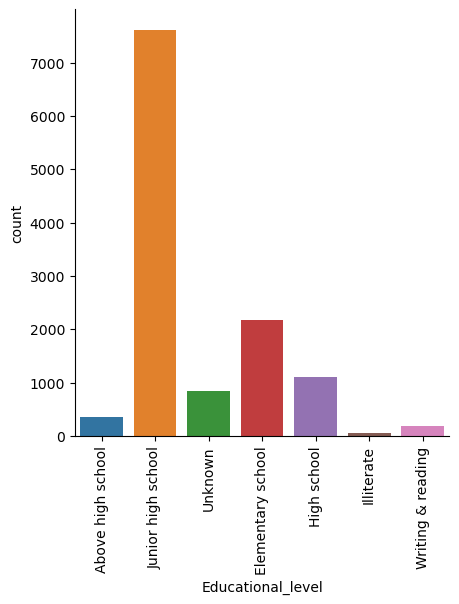

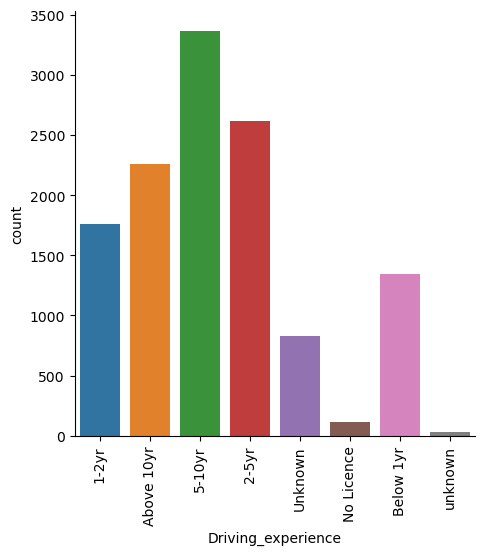

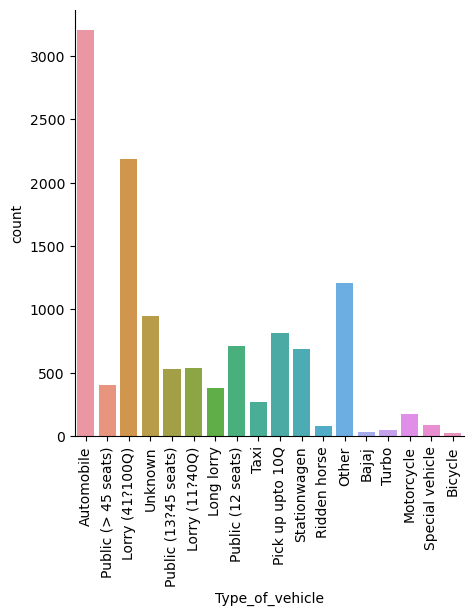

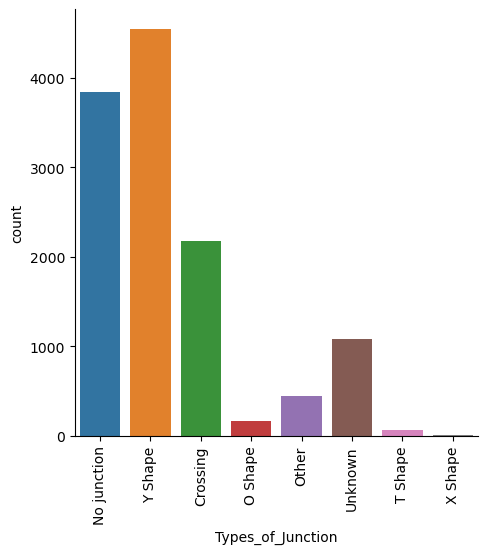

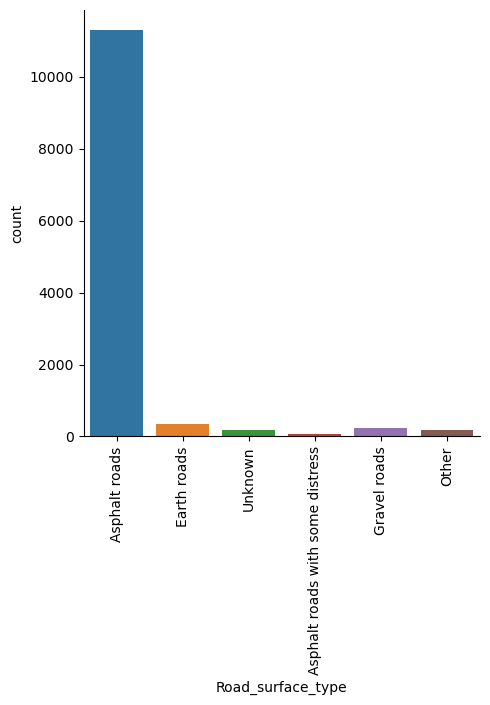

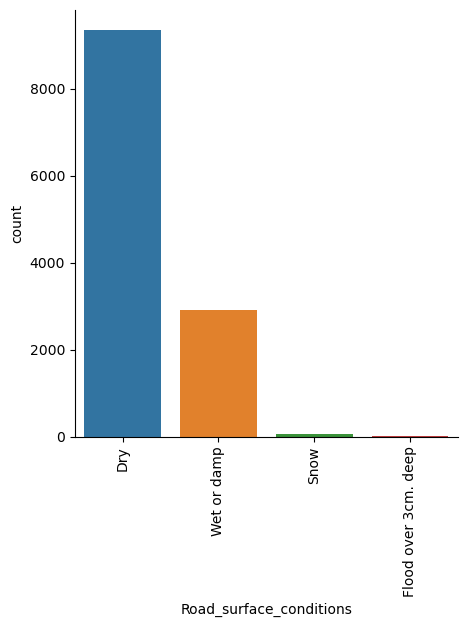

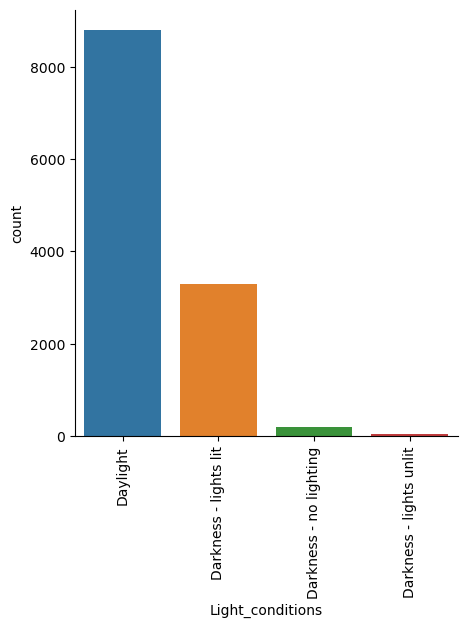

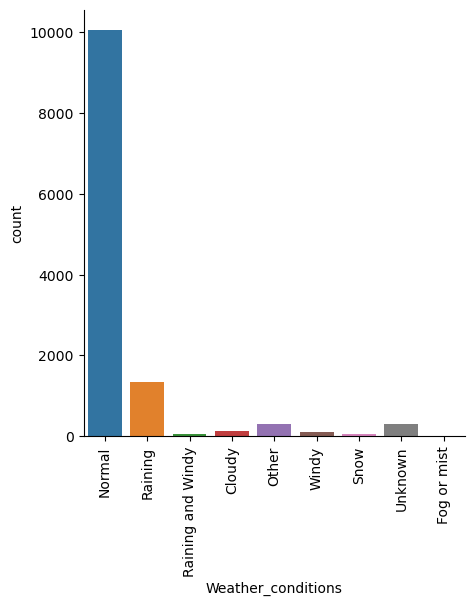

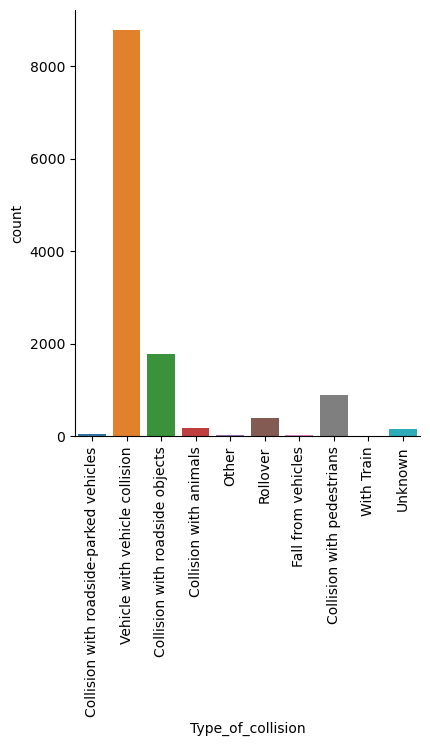

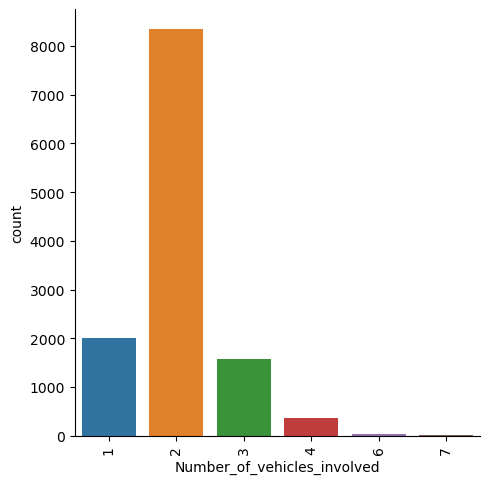

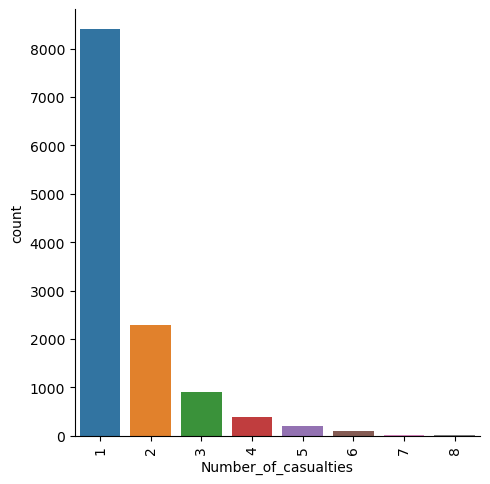

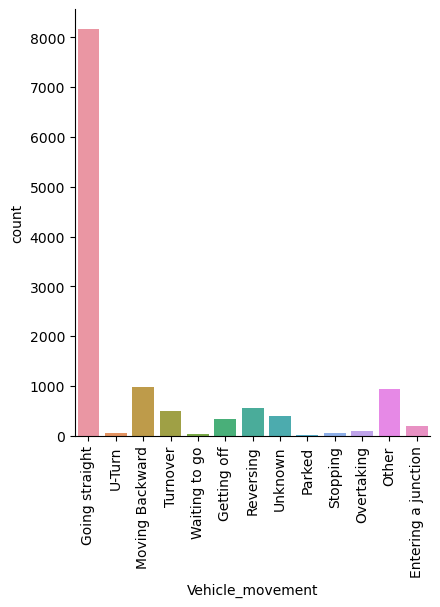

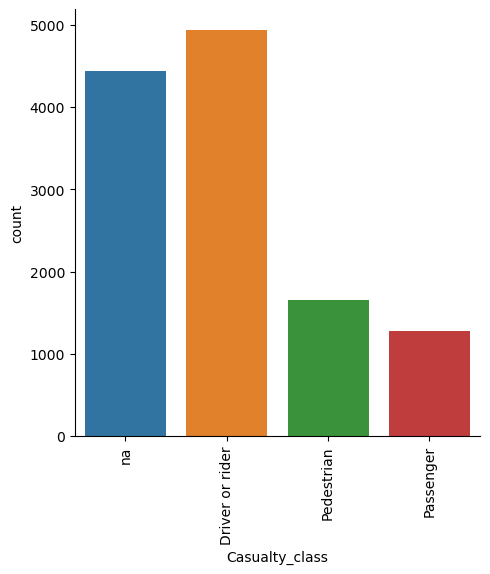

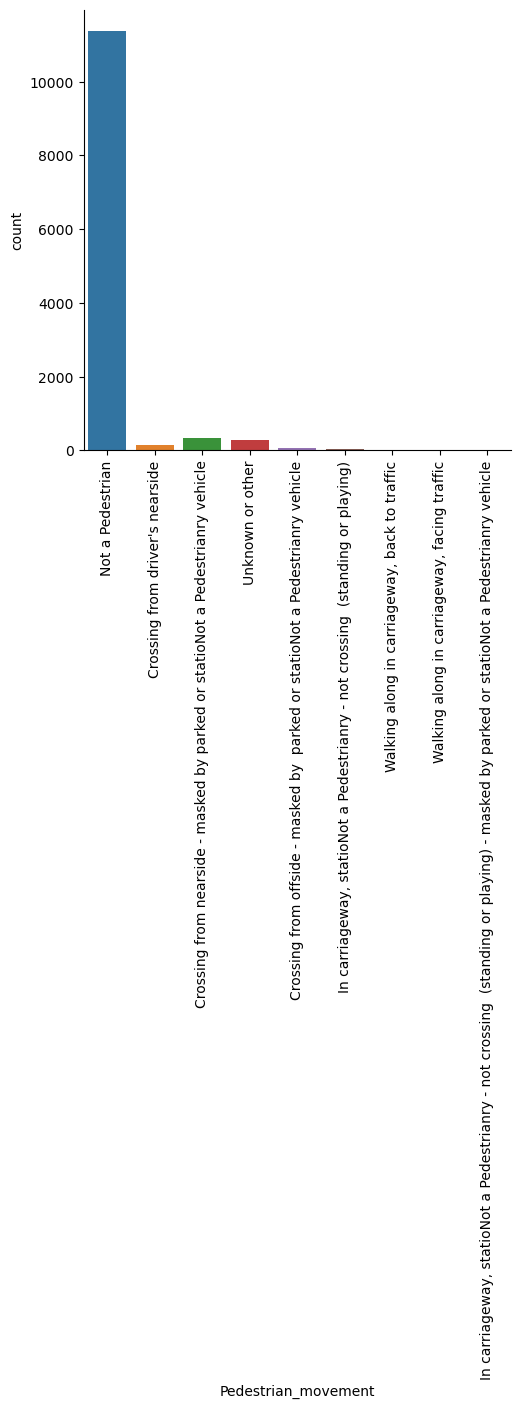

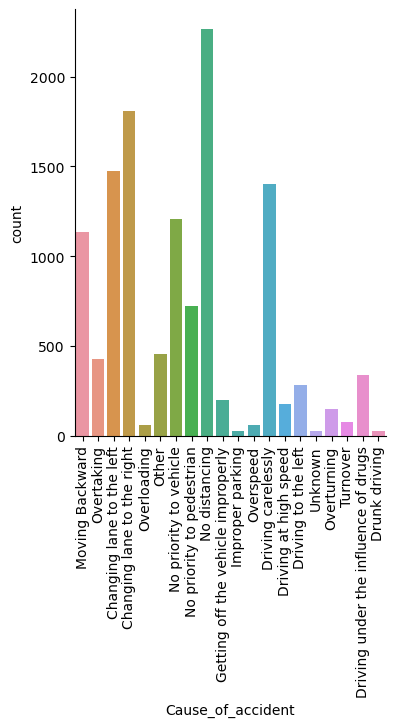

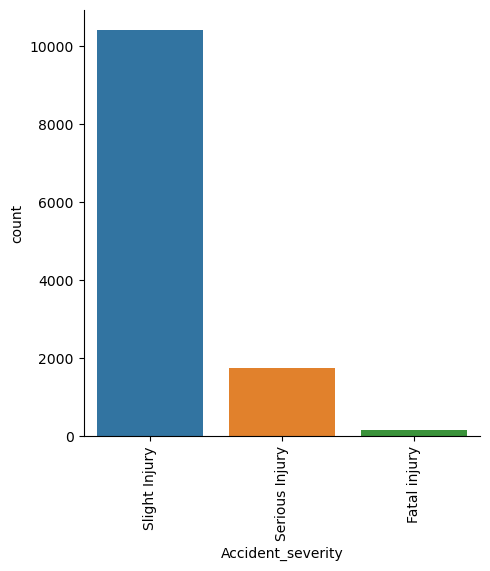

In [34]:
for i in rta_df.columns:
    sns.catplot(   # La función catplot en Seaborn se utiliza para crear gráficos categóricos
    rta_df,
    x = i,
    kind = 'count'
    )
    plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

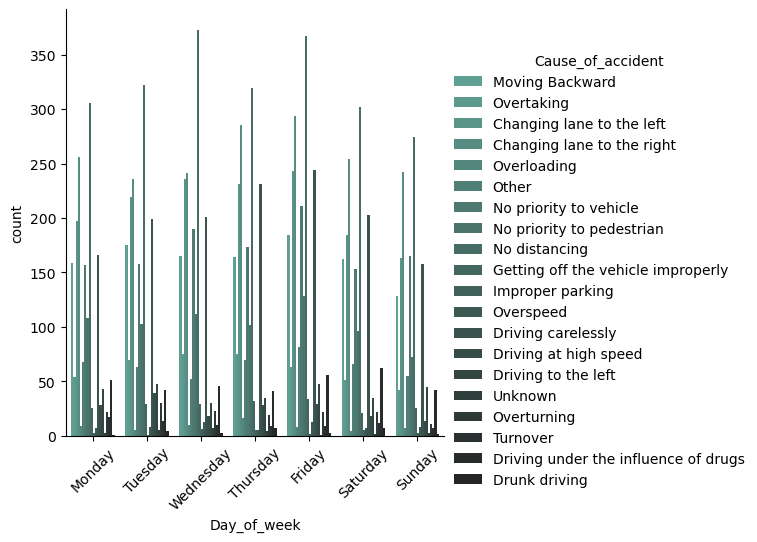

In [35]:
sns.catplot(   # La función catplot en Seaborn se utiliza para crear gráficos categóricos
    rta_df,
    x = rta_df.columns[1],
    kind = 'count',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    hue='Cause_of_accident',
    legend='full',
    palette="dark:#5A9_r"
)
plt.xticks(rotation=45)

## Medidas de tendencia central y de dispersión

**Media o promedio**

In [36]:
rta_df.Number_of_casualties.mean()

1.548148749594024

In [37]:
rta_df.mean()

/tmp/ipykernel_27877/2087285366.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rta_df.mean()


Number_of_vehicles_involved    2.040679
Number_of_casualties           1.548149
dtype: float64

**Mediana**

In [38]:
rta_df.median()

/tmp/ipykernel_27877/2908298485.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rta_df.median()


Number_of_vehicles_involved    2.0
Number_of_casualties           1.0
dtype: float64

**Moda**

In [39]:
rta_df.mode()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Pedestrian_movement,Cause_of_accident,Accident_severity
0,15:30:00,Friday,18-30,Male,Junior high school,5-10yr,Automobile,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Driver or rider,Not a Pedestrian,No distancing,Slight Injury


**Desviación estándard y varianza**

In [40]:
rta_df.std(), rta_df.var()

/tmp/ipykernel_27877/2880816263.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rta_df.std(), rta_df.var()
/tmp/ipykernel_27877/2880816263.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rta_df.std(), rta_df.var()


(Number_of_vehicles_involved    0.688790
 Number_of_casualties           1.007179
 dtype: float64,
 Number_of_vehicles_involved    0.474431
 Number_of_casualties           1.014409
 dtype: float64)

In [41]:
rta_df.describe(include=object)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316
unique,1074,7,5,3,7,8,18,8,6,4,4,9,10,13,4,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,5-10yr,Automobile,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,3363,3205,4543,11296,9340,8798,10063,8774,8158,4944,11390,2263,10415


In [42]:
rta_df.Type_of_vehicle.unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', 'Unknown',
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

**Máximos**

In [43]:
rta_df.max(), rta_df.max(numeric_only=True)

(Time                                                                9:59:00
 Day_of_week                                                       Wednesday
 Age_band_of_driver                                                  Unknown
 Sex_of_driver                                                       Unknown
 Educational_level                                         Writing & reading
 Driving_experience                                                  unknown
 Type_of_vehicle                                                     Unknown
 Types_of_Junction                                                   Y Shape
 Road_surface_type                                                   Unknown
 Road_surface_conditions                                         Wet or damp
 Light_conditions                                                   Daylight
 Weather_conditions                                                    Windy
 Type_of_collision                                                With Train

**Minimos**

In [44]:
rta_df.min(),rta_df.min(numeric_only=True)

(Time                                                   0:01:00
 Day_of_week                                             Friday
 Age_band_of_driver                                       18-30
 Sex_of_driver                                           Female
 Educational_level                            Above high school
 Driving_experience                                       1-2yr
 Type_of_vehicle                                     Automobile
 Types_of_Junction                                     Crossing
 Road_surface_type                                Asphalt roads
 Road_surface_conditions                                    Dry
 Light_conditions                         Darkness - lights lit
 Weather_conditions                                      Cloudy
 Type_of_collision                       Collision with animals
 Number_of_vehicles_involved                                  1
 Number_of_casualties                                         1
 Vehicle_movement                       

**Rango**

In [45]:
rta_df.max(numeric_only=True)-rta_df.min(numeric_only=True)

Number_of_vehicles_involved    6
Number_of_casualties           7
dtype: int64

**Rango intercuantilico**

In [46]:
rta_df.quantile([0.25,0.5,0.75])

/tmp/ipykernel_27877/2615186888.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rta_df.quantile([0.25,0.5,0.75])


,Number_of_vehicles_involved,Number_of_casualties
0.25,2.0,1.0
0.50,2.0,1.0
0.75,2.0,2.0


In [47]:
rta_df.quantile(0.75)-rta_df.quantile(0.25)

/tmp/ipykernel_27877/3710387944.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rta_df.quantile(0.75)-rta_df.quantile(0.25)


Number_of_vehicles_involved    0.0
Number_of_casualties           1.0
dtype: float64

## Distribuciones: PMFs, CDFs, PDFs

**Histograma**

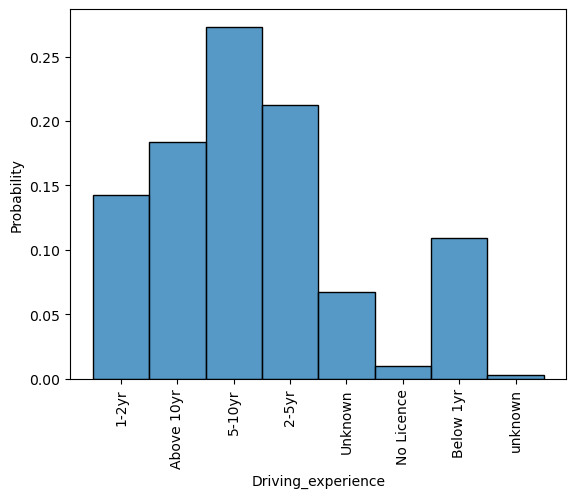

In [48]:
sns.histplot(
    data=rta_df,
    x=rta_df.columns[5],
    binwidth=1,
    stat='probability'
)
plt.xticks(rotation=90)
plt.show()

**Orden de experiencia de manejo**

In [49]:
rta_df['Driving_experience'] = pd.Categorical(
    rta_df['Driving_experience'],
    categories=['No Licence','Below 1yr','1-2yr','2-5yr','5-10yr','Above 10yr','Unknown'],
    ordered=False)

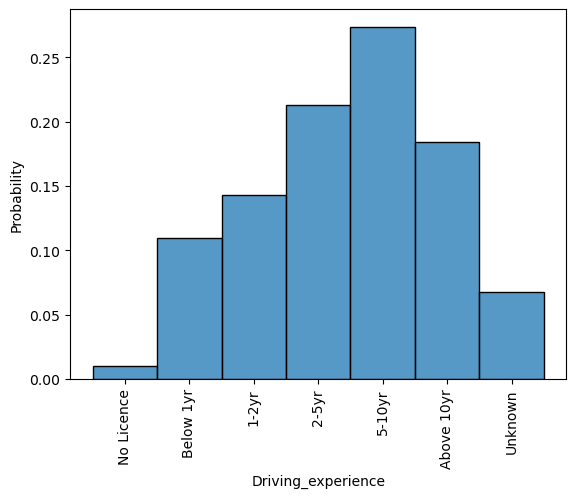

In [50]:
sns.histplot(
    data=rta_df,
    x=rta_df.columns[5],
    binwidth=1,
    stat='probability'
)
plt.xticks(rotation=90)
plt.show()

**Usando empiricaldist**

In [51]:
pmf_rta_time = empiricaldist.Pmf.from_seq(
    rta_df.Time,
    normalize=False 
)
pmf_rta_time

,probs
0:01:00,9
0:02:00,2
0:03:00,2
0:04:00,1
0:06:00,2
...,...
9:55:00,20
9:56:00,2
9:57:00,12
9:58:00,1


In [52]:
empiricaldist.Pmf.from_seq(
    rta_df.Time,
    normalize=False          # La función nos da la tabla de frecuencias
)

,probs
0:01:00,9
0:02:00,2
0:03:00,2
0:04:00,1
0:06:00,2
...,...
9:55:00,20
9:56:00,2
9:57:00,12
9:58:00,1


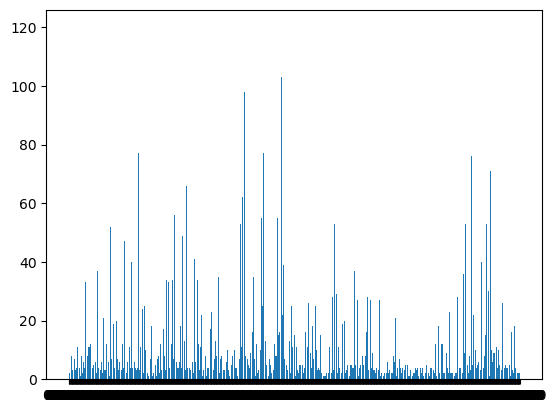

In [53]:
pmf_rta_time.bar()

**Distribuciones**
Para variables numericas

<Axes: xlabel='Number_of_vehicles_involved', ylabel='Density'>

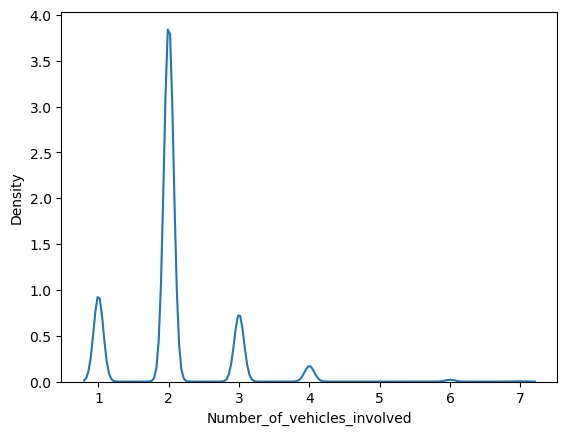

In [54]:
sns.kdeplot(
    data = rta_df,
    x=rta_df.columns[13],
    bw_method=0.1
)

## Relaciones en las gráficas

**gráfica de puntos**

<Axes: xlabel='Day_of_week', ylabel='Type_of_collision'>

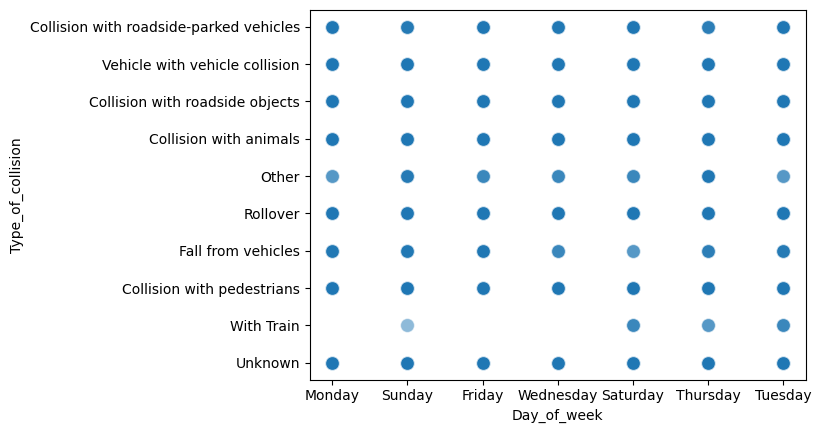

In [55]:
sns.scatterplot(
    data=rta_df,
    x='Day_of_week',
    y='Type_of_collision',
    alpha=1/2,
    s=100
)

**Histograma 2D**

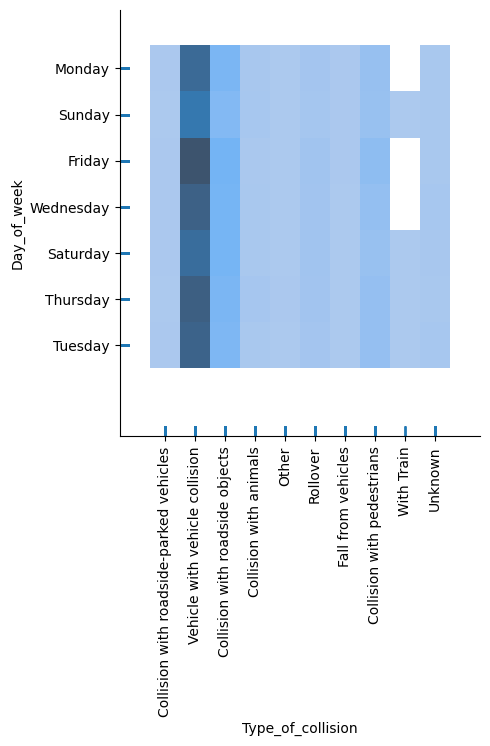

In [56]:
sns.displot(
    data=rta_df,
    x='Type_of_collision',
    y='Day_of_week',
    rug=True
)
plt.xticks(rotation=90)
plt.show()

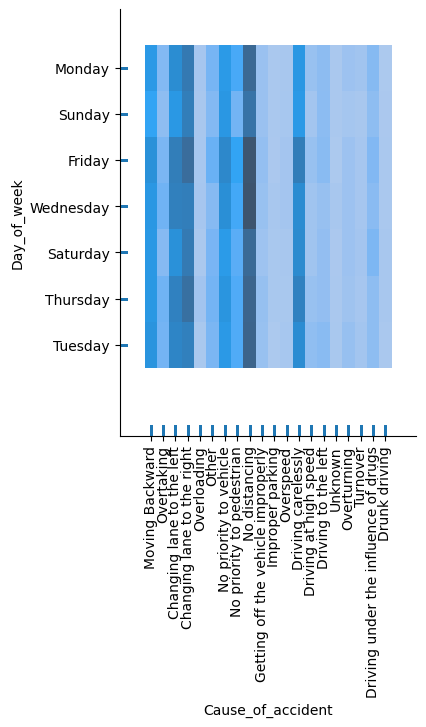

In [57]:
sns.displot(
    data=rta_df,
    x='Cause_of_accident',
    y='Day_of_week',
    rug=True
)
plt.xticks(rotation=90)
plt.show()


/tmp/ipykernel_27877/1377624053.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=rta_df.corr(),


<Axes: >

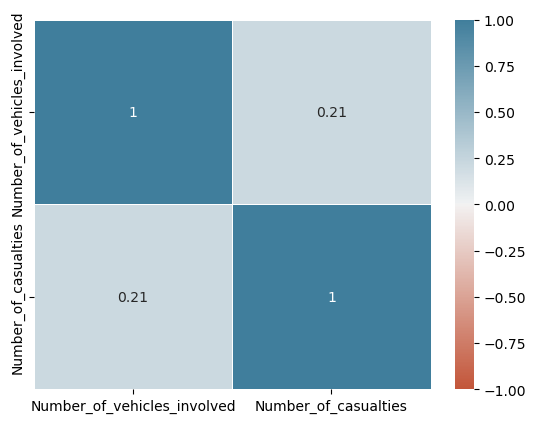

In [58]:
sns.heatmap(
    data=rta_df.corr(),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

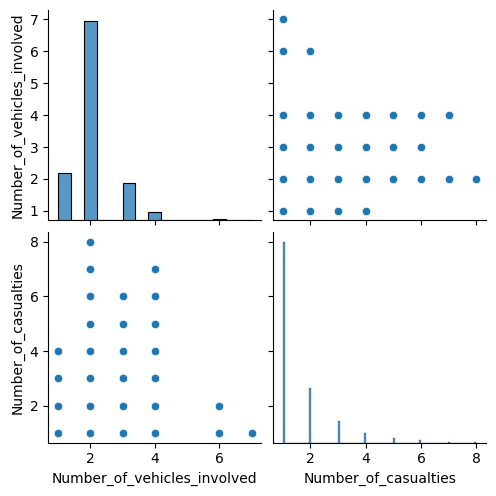

In [59]:
sns.pairplot(
    data=rta_df,
)

## Graficas para dotos categóricos

El presente data set contiene mayormente datos categóricos. Por esta razón se realiza en analisis mas detallado mediante la función sns.catplot()

### Kind = 'count'

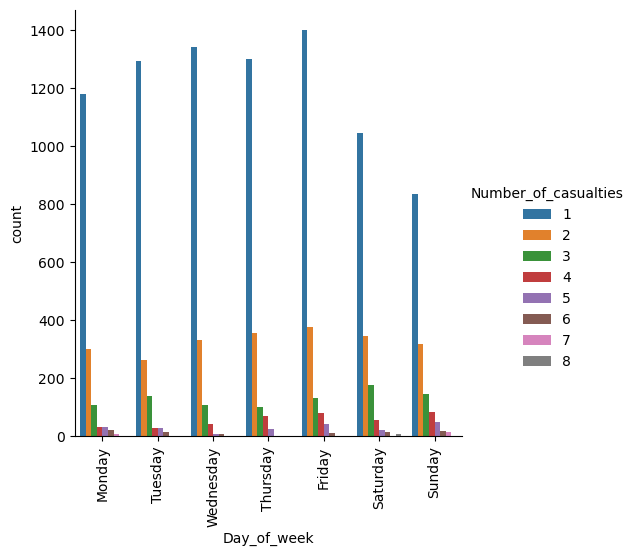

In [60]:
sns.catplot(
    data=rta_df,
    x='Day_of_week',
    kind = 'count',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    hue='Number_of_casualties'
)
plt.xticks(rotation=90)
plt.show()

### kind = 'strip'

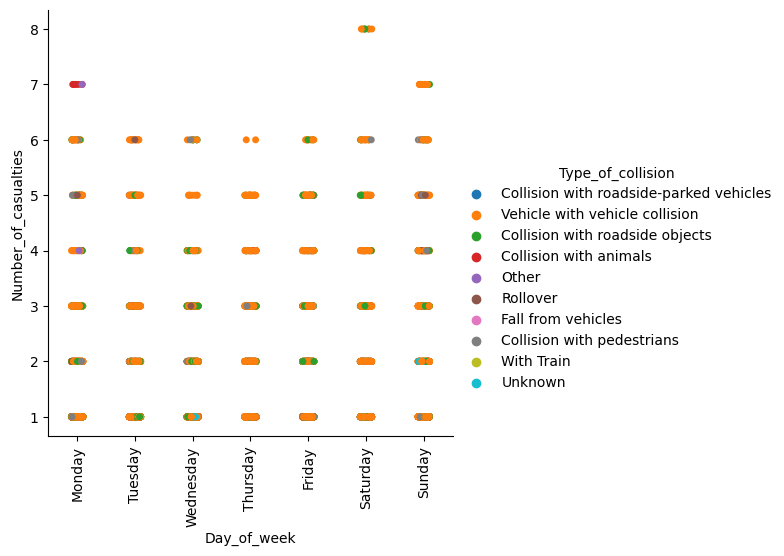

In [61]:
sns.catplot(
    data=rta_df,
    kind = 'strip',
    x='Day_of_week',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    y='Number_of_casualties',
    hue='Type_of_collision'
)
plt.xticks(rotation=90)
plt.show()

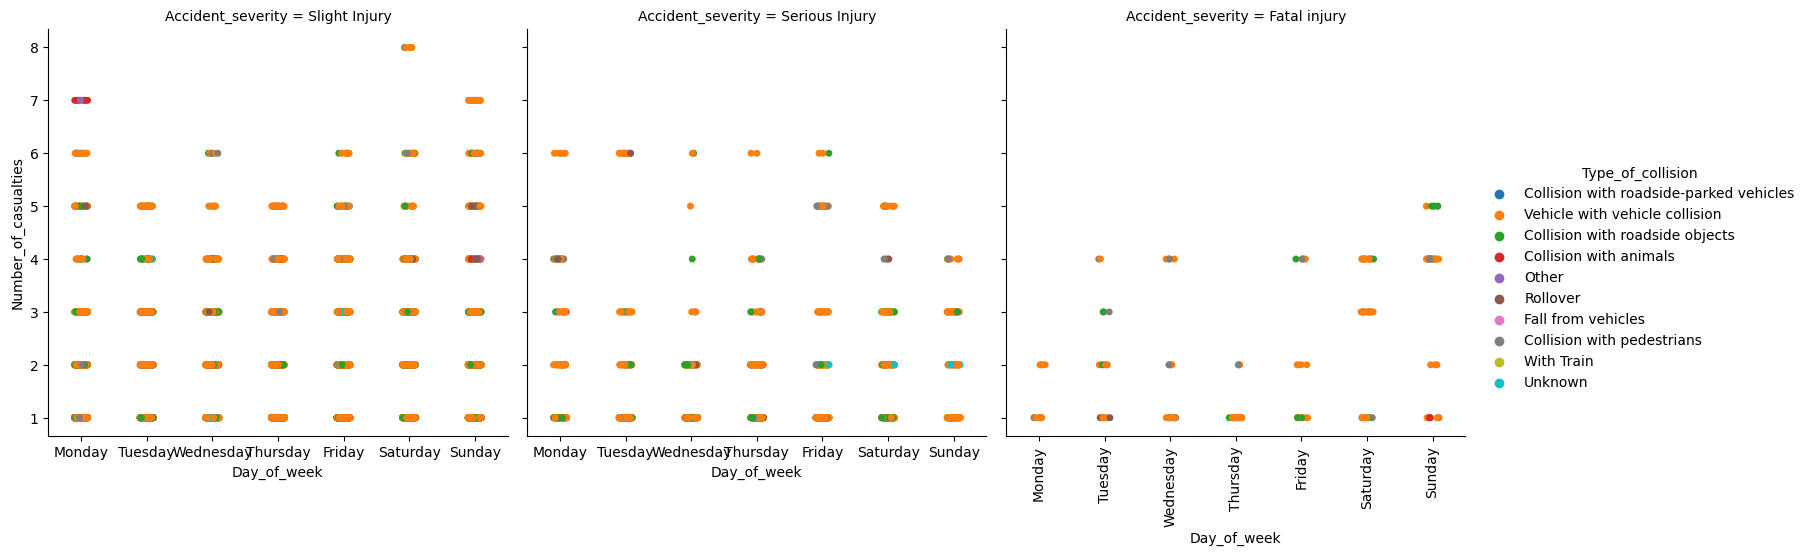

In [62]:
sns.catplot(
    data=rta_df,
    kind = 'strip',
    x='Day_of_week',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    y='Number_of_casualties',
    hue='Type_of_collision',
    col='Accident_severity'
)
plt.xticks(rotation=90)
plt.show()

### kind = 'swarm'
Se usa en casos que no haya muchos datos.

No adecuado para las siguientes variables

'sns.catplot(
    
    data=rta_df,
    kind = 'swarm',
    x='Day_of_week',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    y='Number_of_casualties',
    hue='Type_of_collision',
    col='Accident_severity'
)
plt.xticks(rotation=90)
plt.show()
'

Se generó el siguiente error:

*UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)*

### Violín plot

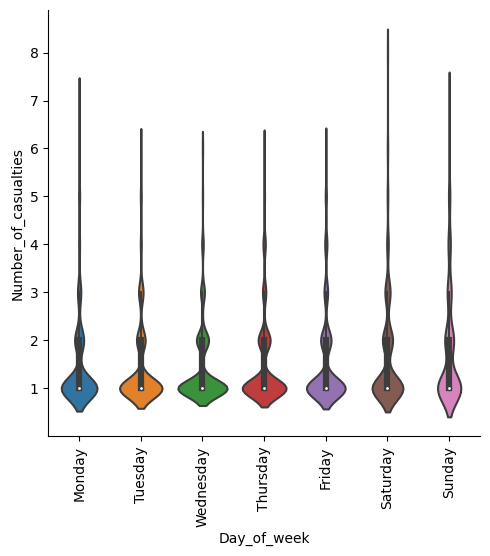

In [63]:
sns.catplot(
    data=rta_df,
    kind = 'violin',
    x='Day_of_week',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    y='Number_of_casualties'
)
plt.xticks(rotation=90)
plt.show()

### Gráficas de estimación

### Point plot

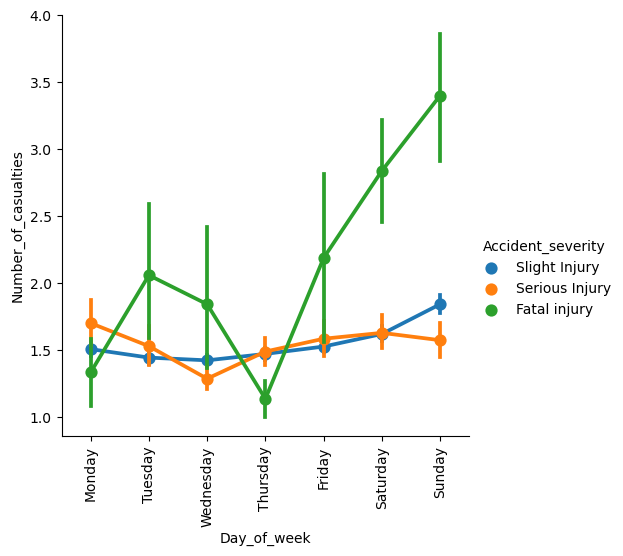

In [64]:
sns.catplot(
    data=rta_df,
    kind = 'point',
    x='Day_of_week',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    y='Number_of_casualties',
    #hue='Type_of_collision',
    hue='Accident_severity'
)
plt.xticks(rotation=90)
plt.show()

### Barplot

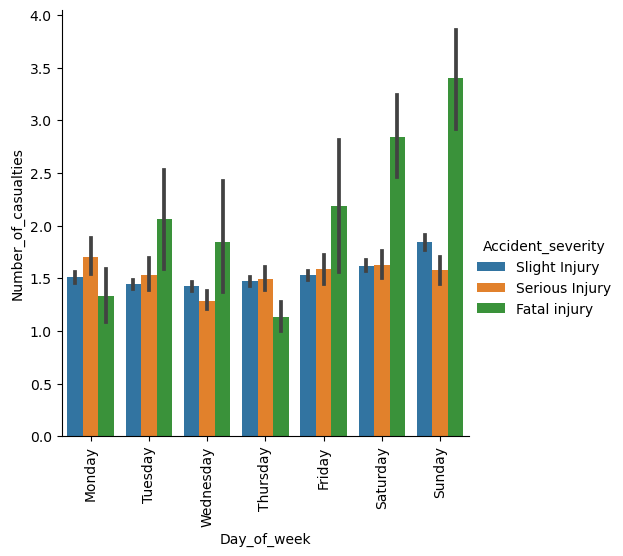

In [65]:
sns.catplot(
    data=rta_df,
    kind = 'bar',
    x='Day_of_week',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    y='Number_of_casualties',
    #hue='Type_of_collision',
    hue='Accident_severity'
)
plt.xticks(rotation=90)
plt.show()

## Pasar la columna hora a un valor númerico

Podemos transformar la hora a valor numerico con la siguiente función:

In [66]:
def time_to_float(tiempo_str):
    # Dividir la cadena en horas, minutos y segundos
    partes = tiempo_str.split(':')
    
    # Extraer horas, minutos y segundos
    horas = int(partes[0])
    minutos = int(partes[1])
    segundos = int(partes[2])
    
    # Calcular el valor numérico
    valor_numerico = horas + minutos / 60 + segundos / 3600
    
    return valor_numerico

# Ejemplo de uso
tiempo_str = "12:15:03"
valor_numerico = time_to_float(tiempo_str)

print(f"Valor numérico para {tiempo_str}: {valor_numerico}")


Valor numérico para 12:15:03: 12.250833333333333


Ahora se escribirá una columna nueva donde la hora se escriba en valor númerico

In [67]:
print(rta_df.Time[1500])
print(type(rta_df.Time[1500]))
print(time_to_float(rta_df.Time[1500]))

12:30:00
<class 'str'>
12.5


In [68]:
rta_df = (
    rta_df
    .assign(
        Time_to_float=rta_df.Time.apply(lambda value: time_to_float(value))
    )
)
rta_df.Time,rta_df.Time_to_float

(0        17:02:00
 1        17:02:00
 2        17:02:00
 3         1:06:00
 4         1:06:00
            ...   
 12311    16:15:00
 12312    18:00:00
 12313    13:55:00
 12314    13:55:00
 12315    13:55:00
 Name: Time, Length: 12316, dtype: object,
 0        17.033333
 1        17.033333
 2        17.033333
 3         1.100000
 4         1.100000
            ...    
 12311    16.250000
 12312    18.000000
 12313    13.916667
 12314    13.916667
 12315    13.916667
 Name: Time_to_float, Length: 12316, dtype: float64)

Ahora podemos graficar la densidad de accidentes por hora:

<Axes: xlabel='Time_to_float', ylabel='Probability'>

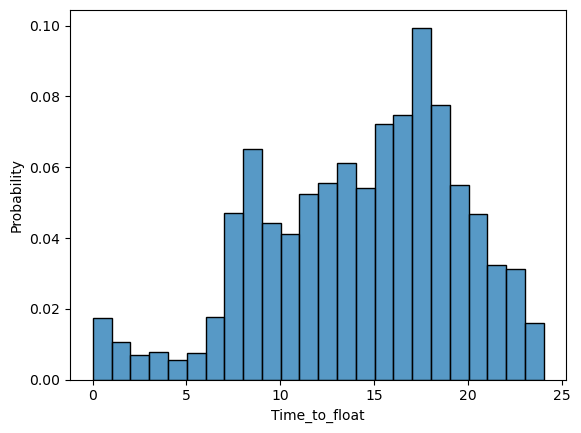

In [69]:
sns.histplot(
    data=rta_df,
    x='Time_to_float',
    binwidth=1,
    stat='probability'
)

<Axes: xlabel='Time_to_float', ylabel='Density'>

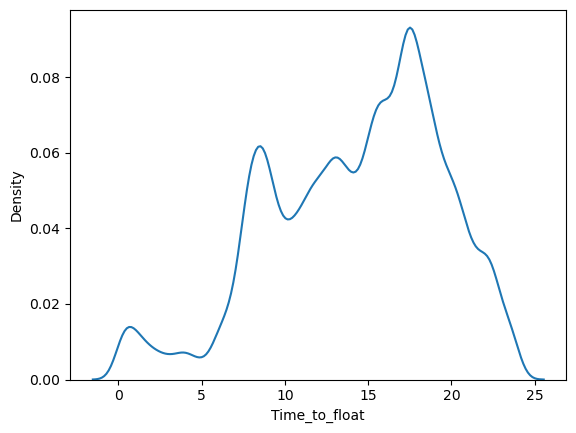

In [70]:
sns.kdeplot(
    data = rta_df,
    x='Time_to_float',
    bw_method=0.1
)

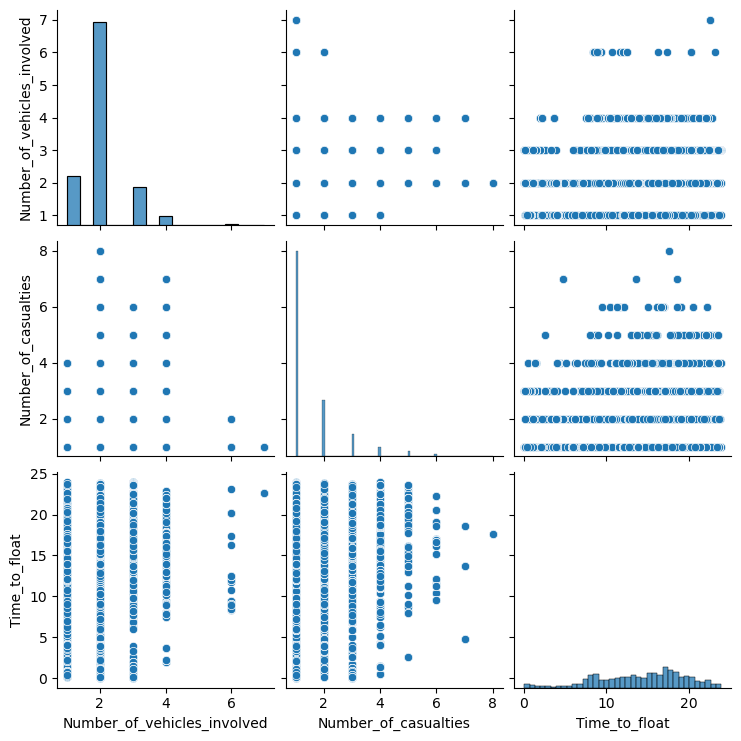

In [71]:
sns.pairplot(
    data=rta_df,
)

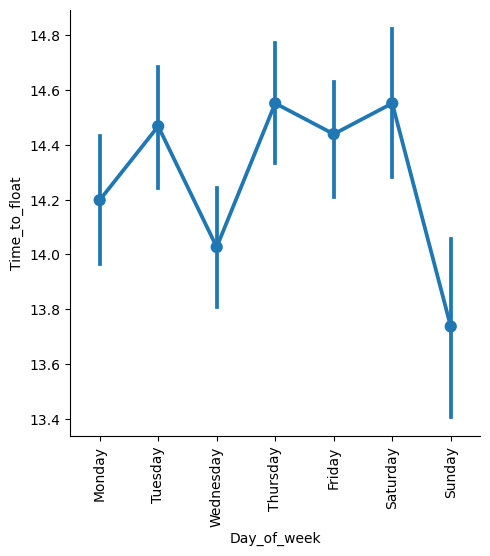

In [72]:
sns.catplot(
    data=rta_df,
    kind = 'point',
    x='Day_of_week',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    y='Time_to_float',
    #hue='Type_of_collision',
    #hue='Accident_severity'
)
plt.xticks(rotation=90)
plt.show()

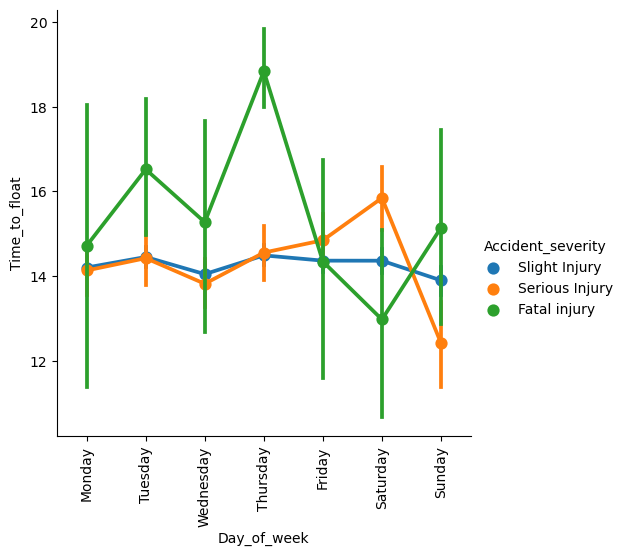

In [73]:
sns.catplot(
    data=rta_df,
    kind = 'point',
    x='Day_of_week',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    y='Time_to_float',
    #hue='Type_of_collision',
    hue='Accident_severity'
)
plt.xticks(rotation=90)
plt.show()

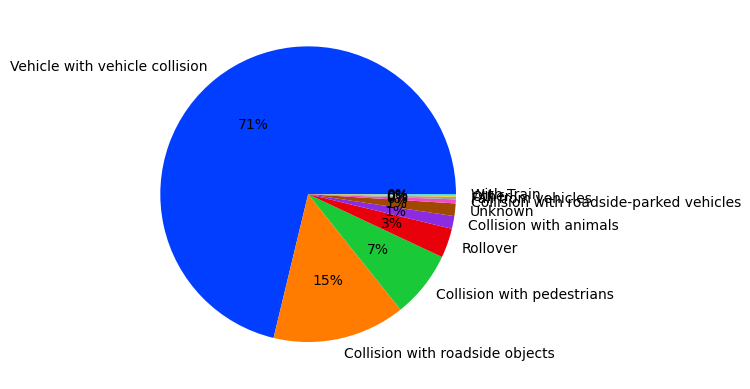

In [74]:
colors = sns.color_palette("bright")

plt.pie(rta_df['Type_of_collision'].value_counts(),
        labels=rta_df['Type_of_collision'].value_counts().index,
        colors=colors,
        autopct="%0.0f%%")
plt.show()

In [75]:
print(np.unique(rta_df['Type_of_collision']),
      np.array(rta_df['Type_of_collision'].value_counts()))
print(rta_df['Type_of_collision'].value_counts().index)


['Collision with animals' 'Collision with pedestrians'
 'Collision with roadside objects'
 'Collision with roadside-parked vehicles' 'Fall from vehicles' 'Other'
 'Rollover' 'Unknown' 'Vehicle with vehicle collision' 'With Train'] [8774 1786  896  397  171  169   54   34   26    9]
Index(['Vehicle with vehicle collision', 'Collision with roadside objects',
       'Collision with pedestrians', 'Rollover', 'Collision with animals',
       'Unknown', 'Collision with roadside-parked vehicles',
       'Fall from vehicles', 'Other', 'With Train'],
      dtype='object')
